# **Project Title-Netflix Movies and TV Shows Clustering**

***Name-***Mohd Firoz Chaudhri

***Contribution-***Individual

# **Problem Statement**

Netflix has a large collection of movies and TV shows.
Because of this, it becomes difficult to organize content
and recommend similar shows to users.

The main problem is to group similar movies and TV shows
based on their content and genres.

# **Objective**


- To analyze the Netflix Movies and TV Shows dataset  
- To clean and preprocess the data  
- To convert text data into numerical form  
- To apply clustering using unsupervised machine learning  
- To group similar movies and TV shows into clusters  
- To understand how clustering can help in content recommendation

# **Dataset Description**

This dataset contains information about movies and TV shows
available on Netflix.

Each row represents a movie or a TV show, and each column
represents a specific feature of that content.

---

# **Dataset Features**

- **show_id**: Unique ID for each movie or TV show  
- **type**: Movie or TV Show  
- **title**: Name of the movie or TV show  
- **director**: Director of the content  
- **cast**: Actors involved  
- **country**: Country where the content was produced  
- **date_added**: Date when the content was added to Netflix  
- **release_year**: Year of release  
- **rating**: Age rating of the content  
- **duration**: Duration of the movie or number of seasons  
- **listed_in**: Genre of the content  
- **description**: Short summary of the movie or TV show  

---

# **Dataset Shape**

The dataset contains multiple rows and columns representing
different movies and TV shows available on Netflix.

# **Github Link**

In [ ]:
#Importing libraries that are required
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading dataset
df=pd.read_csv('/content/drive/MyDrive/Netflix dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
#check first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#check last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
#check random 10 rows
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6100,s6101,Movie,The B-Side: Elsa Dorfman's Portrait Photography,Errol Morris,Elsa Dorfman,United States,"October 31, 2017",2016,R,76 min,Documentaries,"Filmmaker Errol Morris probes the life, work a..."
3992,s3993,Movie,Mauli,Aditya Sarpotdar,"Riteish Deshmukh, Saiyami Kher, Jitendra Joshi...",India,"July 17, 2019",2018,TV-14,136 min,"Action & Adventure, Dramas, International Movies",An unconventional police officer faces off aga...
1131,s1132,Movie,Bugs,Andreas Johnsen,NaN,"Netherlands, Denmark, France, Germany","February 20, 2018",2016,TV-G,73 min,"Documentaries, International Movies",A willing team of chefs and researchers goes o...
2004,s2005,Movie,Enemy,Denis Villeneuve,"Jake Gyllenhaal, Mélanie Laurent, Sarah Gadon,...","Canada, Spain, France","July 15, 2018",2013,R,91 min,"Independent Movies, Thrillers",When a humdrum academic spots his double in a ...
7002,s7003,Movie,The Wishing Tree,Manika Sharma,"Shabana Azmi, Makrand Deshpande, Harshpreet Ka...",India,"June 5, 2017",2017,TV-14,117 min,"Children & Family Movies, Dramas, Music & Musi...",Five children living on the edge of a forest b...
4422,s4423,Movie,National Lampoon's Loaded Weapon 1,Gene Quintano,"Emilio Estevez, Samuel L. Jackson, Jon Lovitz,...",NaN,"November 1, 2019",1993,PG-13,82 min,"Action & Adventure, Comedies, Independent Movies","In this parody of the Lethal Weapon franchise,..."
3191,s3192,Movie,Jo Pil-ho: The Dawning Rage,Lee Jeong-beom,"Lee Sun-kyun, Jeon So-nee, Park Hae-joon, Song...",South Korea,"May 3, 2019",2018,TV-MA,128 min,"Dramas, International Movies, Thrillers",On the run from a dogged internal affairs agen...
7412,s7413,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden","December 12, 2017",2017,NR,106 min,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...
2568,s2569,TV Show,H2O: Mermaid Adventures,NaN,"Sonja Ball, Holly Gauthier-Frankel, Thor Bisho...","Germany, Australia, France, China","July 15, 2015",2015,TV-Y7,2 Seasons,Kids' TV,Three high school friends who turn into mermai...
5578,s5579,Movie,Shor In the City,"Raj Nidimoru, Krishna D.K.","Sendhil Ramamurthy, Tusshar Kapoor, Nikhil Dwi...",India,"May 31, 2019",2011,TV-MA,106 min,"Comedies, Dramas, Independent Movies",When three small-time Mumbai crooks steal a ba...


In [ ]:
#lets check shape of the dataset
df.shape

(7787, 12)

So we have 7787 rows and 12 columns in our dataset.

In [ ]:
#check information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#check columns in our dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Data Preprocessing**

Data preprocessing is the initial step in the data analysis process where raw data is prepared and transformed into a clean, organized, and usable format.  Data preprocessing involves cleaning, organizing, and getting the data ready for analysis or modeling. It helps ensure that the data is accurate, relevant, and in a form that can provide meaningful insights or predictions.

In [ ]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

So we found no duplicate value in our dataset

In [ ]:
#Check null values in our dataset
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


So in our dataset we found that director column has 2389 null values,cast column has 718 null values, country column has 507 null values,date_added column has 10 null values and rating has null values.

**Handling null values**

In our dataset director column has more null values,so we will drop this column.And date added and ratings is not necessary column for us,so we will also drop these columns.Cast and country is important column to us,so we will fill missing values in these columns.

In [ ]:
#Drop director,date_added and rating columns from our dataset
df.drop(['director','cast'],axis=1,inplace=True)

In [ ]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#fill missing values in cast and country columns
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
#date_added and rating contains an insignificant portion of the data so we will drop them from dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#Again check null values
df.isnull().sum()

,0
show_id,0
type,0
title,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0
description,0


Now we found that we have no null values in our dataset.

# **EDA(Exploratory Data Analysis)**

EDA is about exploring and getting to know your data. You look at your data, create visualizations, calculate simple statistics, and try to understand the patterns, trends, and interesting things about it. EDA helps you become familiar with your data's story before you dive into more detailed analysis or modeling.

***Count of movies and tv shows***

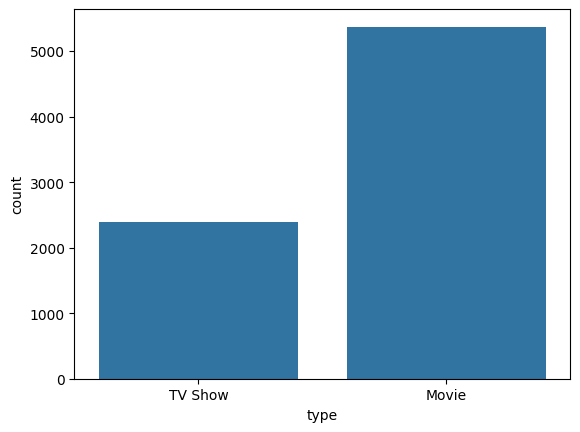

In [ ]:
#Visualize the number of movies and tv shows
#convert data type in to string if it is not
df['type']=df['type'].astype(str)
#handling missing value
df['type'].fillna('Unknown',inplace=True)
#map incorrect values to the correct values
df['type'].replace({'TV Show':'TV Show'},inplace=True)
#Now visualize
sns.countplot(data=df,x='type')
plt.show()

From above plot we can see that movies are more popular than tv shows.

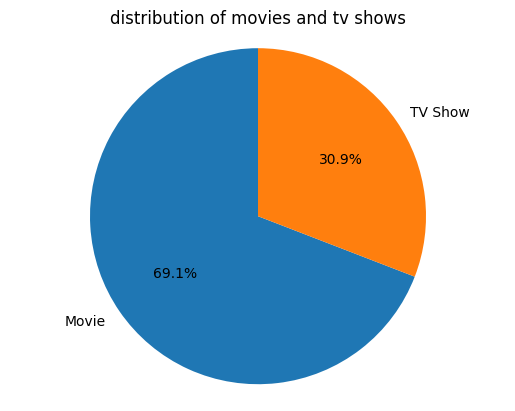

In [ ]:
#Making a pie chart to know the percentage of tv show and movies
type_counts=df['type'].value_counts()
labels=type_counts.index
sizes=type_counts.values

plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('distribution of movies and tv shows')
plt.axis('equal')
plt.show()

From above pie chart we found that around 30% tv shows and around 69% movies are popular on netflix.

In [ ]:
#Now create two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

***Which category has highest ratings***

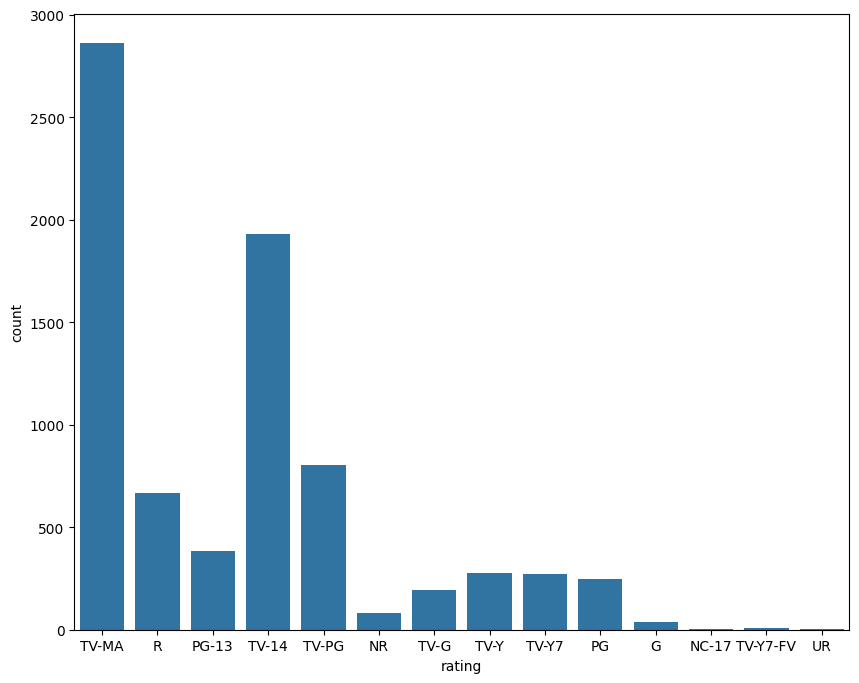

In [ ]:
#lets us check which category has the highest ratings
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='rating')
plt.show()

From above barplot we found that TV_MA is the highest ratings and G is the lowest ratings.

***In which year the maximum numbers of movies released***

In [ ]:
df['release_year'].value_counts().sort_index(ascending=False)

,count
release_year,
2021,31
2020,868
2019,996
2018,1120
2017,1010
...,...
1945,3
1944,3
1943,3


In [ ]:
movies_year=movies['release_year'].value_counts().sort_index(ascending=False)


In [ ]:
tvshows_year=tv_shows['release_year'].value_counts().sort_index(ascending=False)

Text(0.5, 1.02, 'production growth based on years')

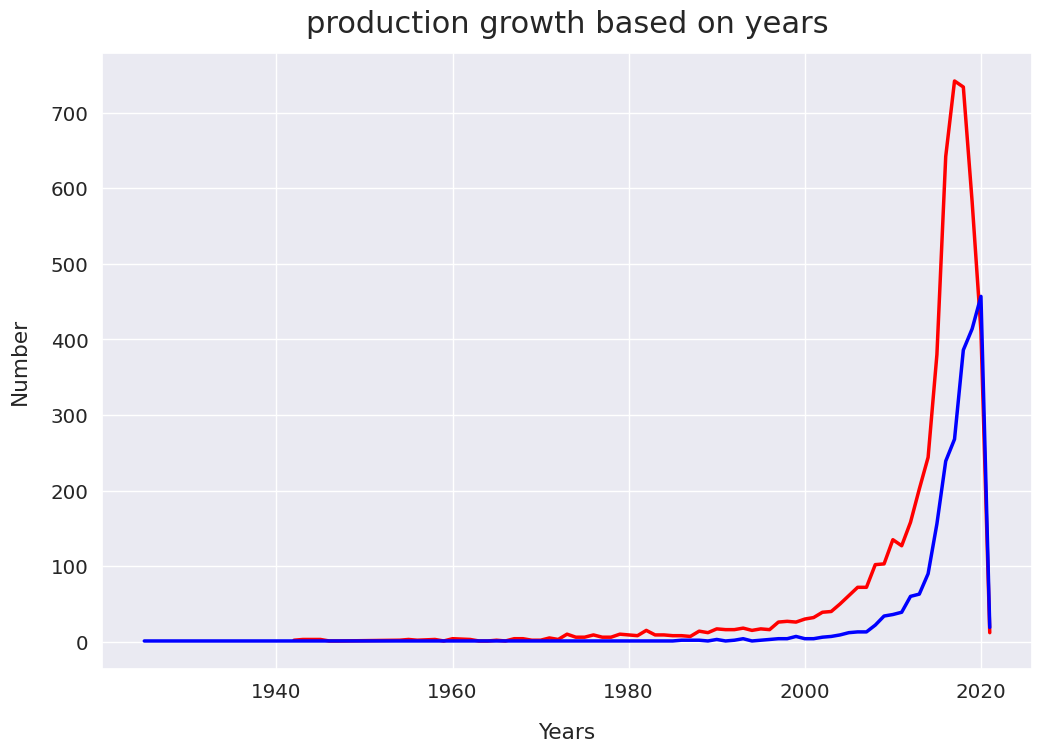

In [ ]:
#Visualization the movies and tv shows based on their released year
sns.set(font_scale=1.3)
movies_year.plot(figsize=(12,8),linewidth=2.5,color='red',label='Movies/year',ms=3)
tvshows_year.plot(figsize=(12,8),linewidth=2.5,color='blue',label='TV Shows/year')
plt.xlabel('Years',labelpad=15)
plt.ylabel('Number',labelpad=15)
plt.title('production growth based on years',y=1.02,fontsize=22)

Red color shows the growth year of movies and blue color shows the growth year of tv shows.As we can see from the graph that as increasing of years also increasing the graph of movies and tv shows.But the popularity of tv shows is less as compare to movies on netflix.

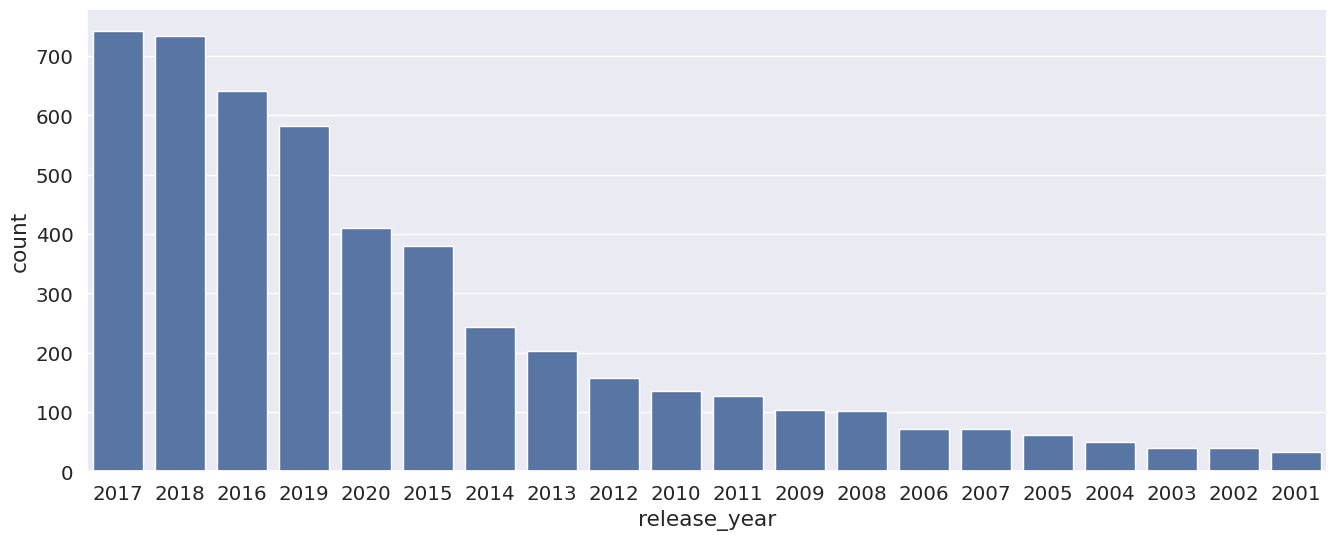

In [ ]:
#Analysing how many movies are released every year in last 20 years
plt.figure(figsize=(16,6))
sns.countplot(x=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])
plt.show()

From above graph we can see that as year increasing the releasing of movies per year is also increasing.So we can say that maximum number of movies released in year 2017.

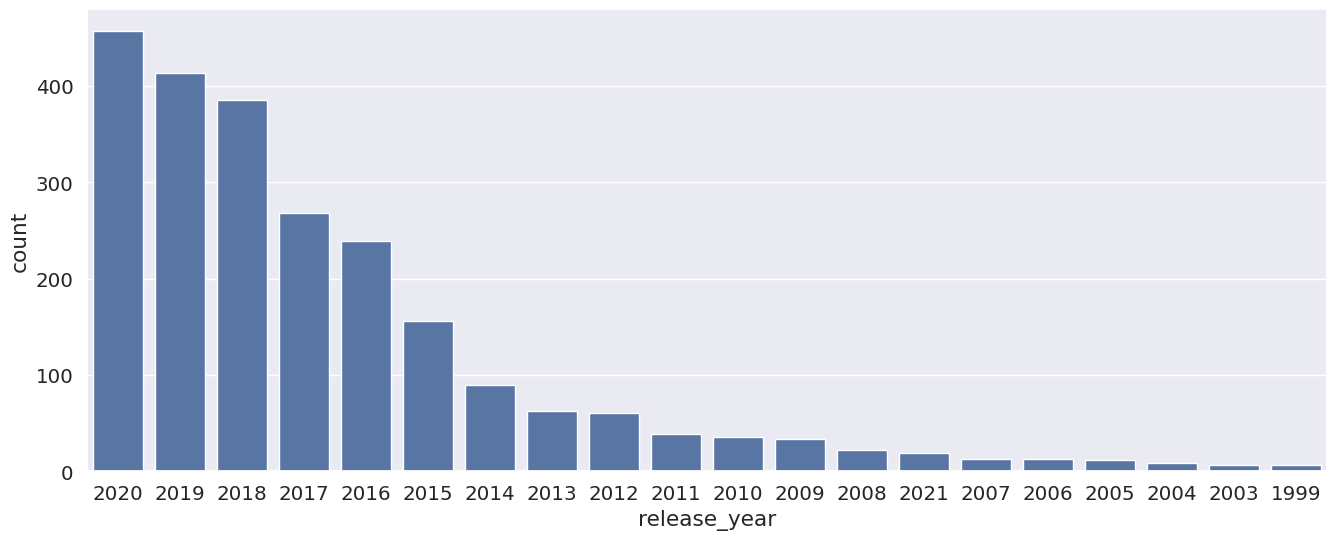

In [ ]:
#Let see how many tv shows are released in past 20 years
plt.figure(figsize=(16,6))
sns.countplot(x=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])
plt.show()

From this as we can that as like movies growth of tv shows is also increasing of increasing years.So we can see that maximum number of tv show released in year 2020.

***Which genre is more popular***

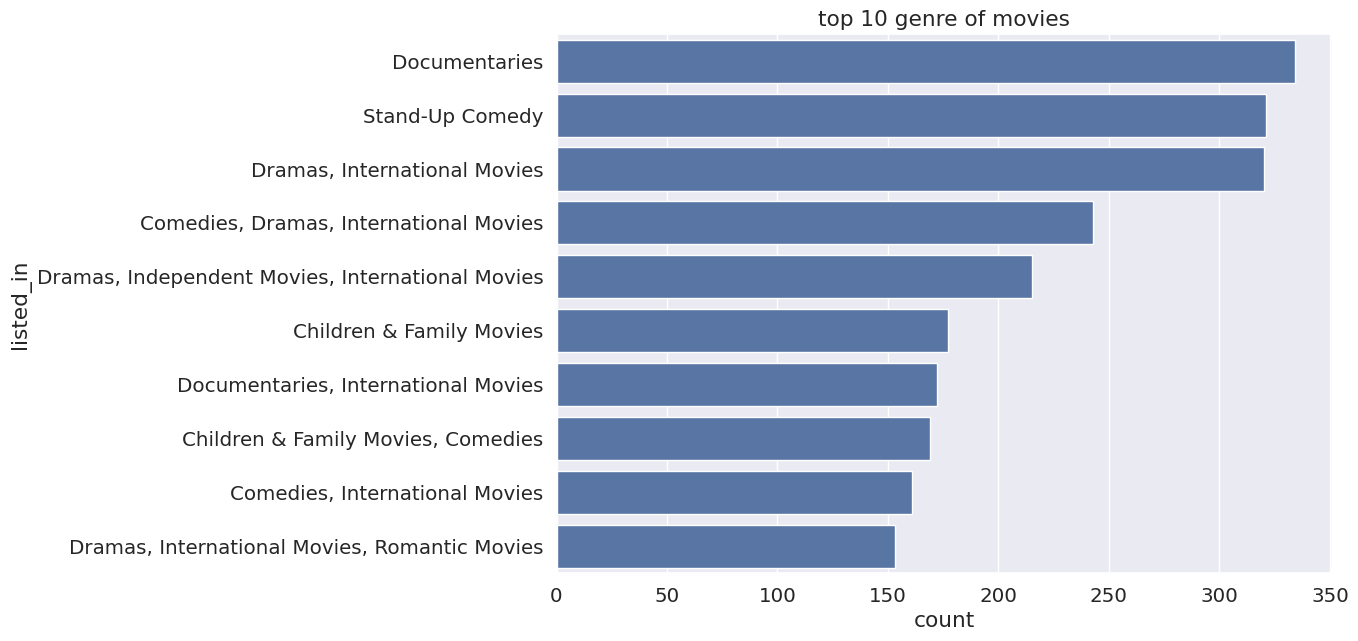

In [ ]:
#Analysing top 10 genre of the movies
plt.figure(figsize=(10,7))
plt.title('top 10 genre of movies')
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])
plt.show()

From graph we can see that documentry is more popular than the other categories.

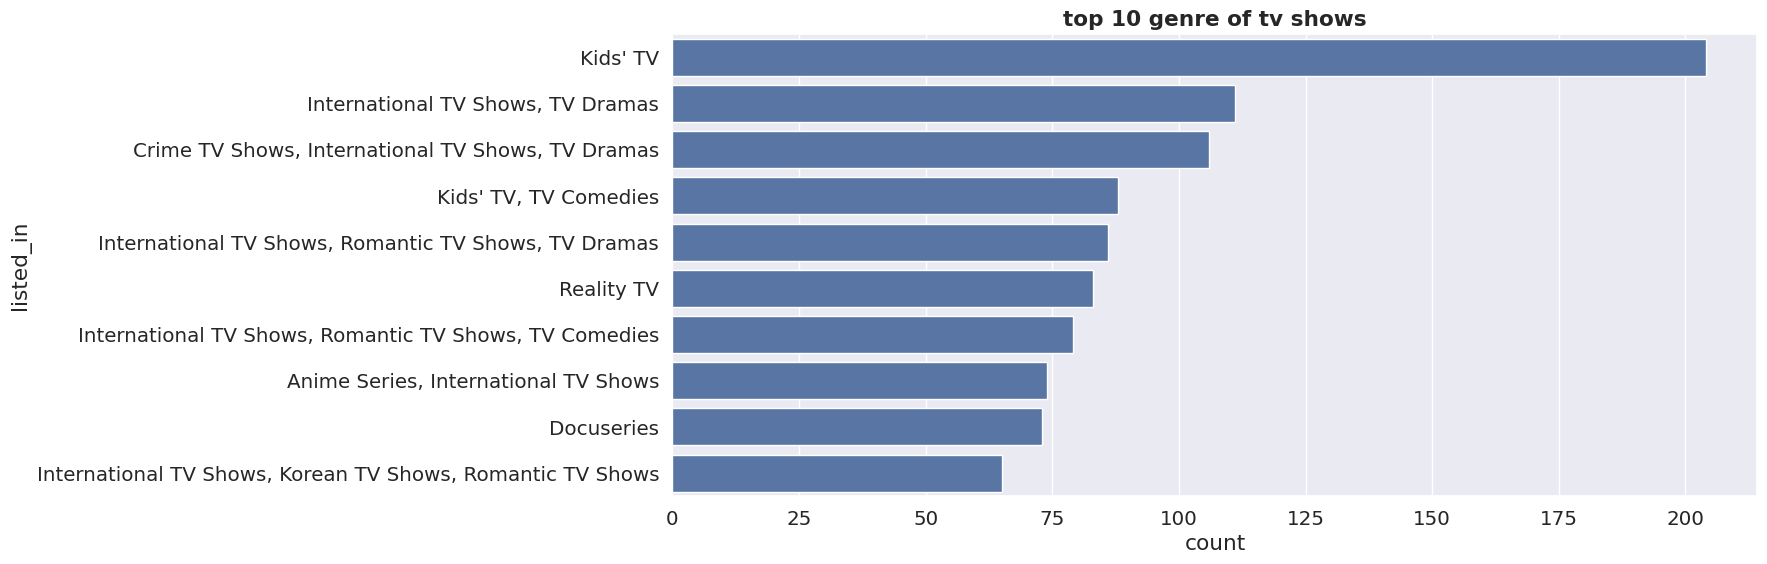

In [ ]:
#Analysing top 10 genre of movies
plt.figure(figsize=(14,6))
plt.title('top 10 genre of tv shows',fontweight='bold')
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])
plt.show()

From this graph we can see that kids TV is more popular in tv shows,accordingly other tv shows.

***Lets check which season has the maximum duration***

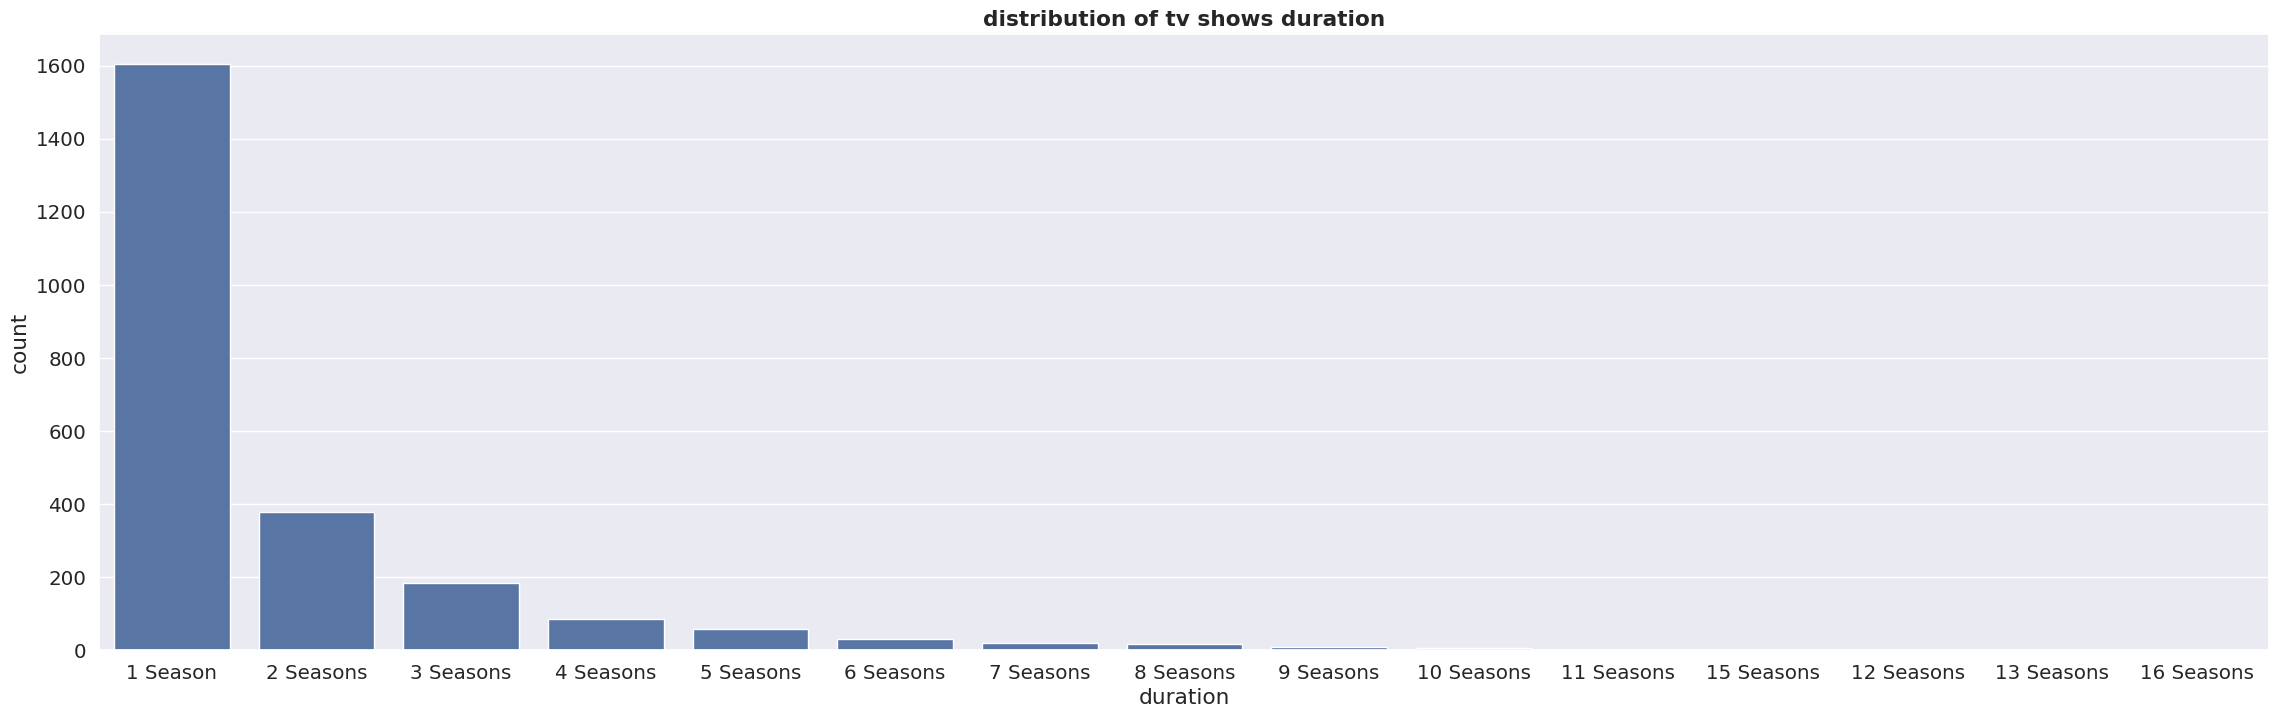

In [ ]:
#lets check distribution of tv shows
plt.figure(figsize=(28,8))
plt.title('distribution of tv shows duration',fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order=tv_shows['duration'].value_counts().index)
plt.show()

So from above graph we see that season 1 is more duration than the other season.

***Which country has the maximum number of content on netflix***

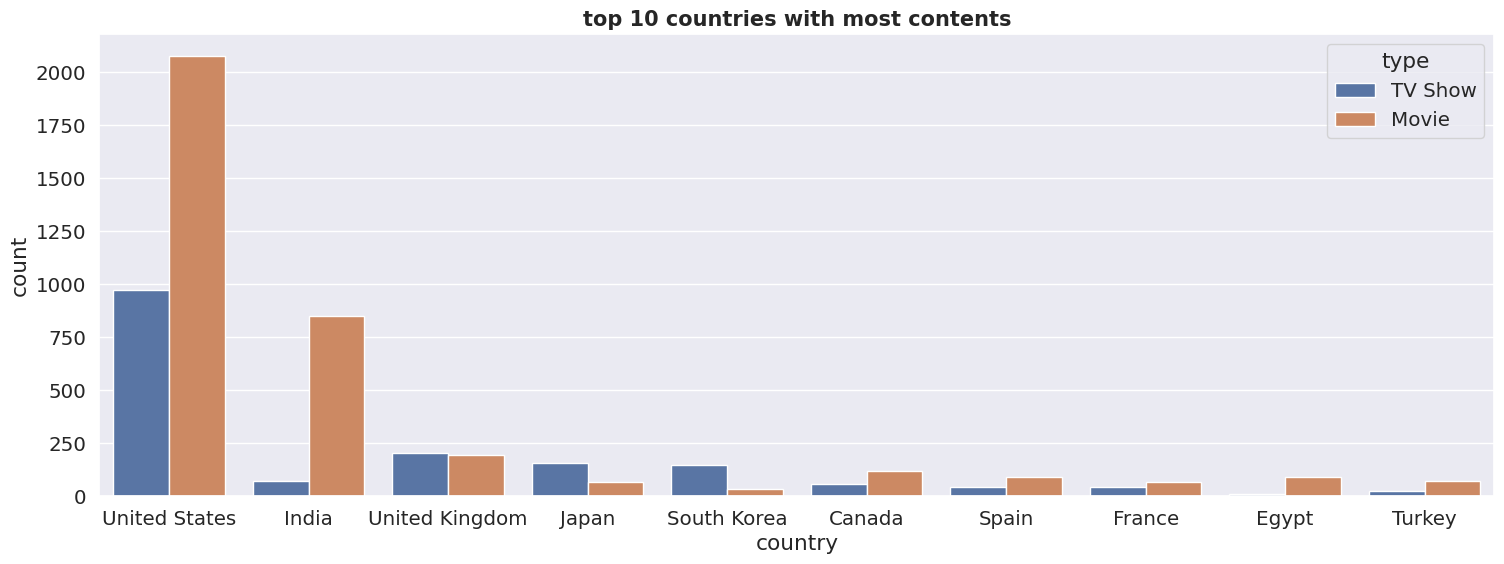

In [ ]:
#Checking top 10 countries with most content
plt.figure(figsize=(18,6))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:10],hue=df['type'])
plt.title('top 10 countries with most contents',fontsize=15,fontweight='bold')
plt.show()

From above barplot we can see that America has maximum number of content avaliable on netflix,than India and than UK.

# ***Feature Engineering and Text Processing***

Feature engineering is one of the most important steps in this project.
Since this is a clustering problem, all data must be converted into
numerical form.

In this project, text-based features are used to understand the
similarity between movies and TV shows.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df.dtypes

,0
show_id,object
type,object
title,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object
description,object


In [ ]:
df['description'].astype(str)

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...
...,...
7782,When Lebanon's Civil War deprives Zozo of his ...
7783,A scrappy but poor boy worms his way into a ty...
7784,"In this documentary, South African rapper Nast..."
7785,Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
#Making list of description features
df['description']=df['description'].apply(lambda x: x.split(' '))

In [ ]:
#converting text feature to string from list
df['description']=df['description'].apply(lambda x: " ".join(x))
#making all words in text feature to lowercase
df['description']=df['description'].apply(lambda x: x.lower())

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
 #replacing the punctuation with no space
    translator = str.maketrans('','', string.punctuation)
    return text.translate(translator)
 #applying above function on text feature


In [ ]:
df['description']=df['description'].apply(remove_punctuation)

In [ ]:
df['description'][0:10]

,description
0,in a future where the elite inhabit an island ...
1,after a devastating earthquake hits mexico cit...
2,when an army recruit is found dead his fellow ...
3,in a postapocalyptic world ragdoll robots hide...
4,a brilliant group of students become cardcount...
5,a genetics professor experiments with a treatm...
6,after an awful accident a couple admitted to a...
7,after one of his high school students attacks ...
8,when a doctor goes missing his psychiatrist wi...
9,an architect and his wife move into a castle t...


In [ ]:
#To download stopwords using nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Defining stopwords
def stopwords(text):
  '''a function for removing the stopword'''
  text=[word for word in text.split() if word not in sw]
  #joining the list of words with space
  return " ".join(text)

In [ ]:
#Apllying above function on  text feature
df['description']=df['description'].apply(stopwords)
df['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [ ]:
#Apllying above function on  text feature
df['description']=df['description'].apply(stopwords)
df['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

Now converting text in to vector

### TF-IDF Vectorization

TF-IDF (Term Frequency–Inverse Document Frequency) is used
to convert text data into numerical vectors.

- It gives importance to meaningful words
- Common words get lower weight
- This helps in measuring similarity between contents

In [ ]:
#Importing Tfidf vectorizer to convert text in to vvector
from sklearn.feature_extraction.text import TfidfVectorizer

#applying Tfidf vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf=tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [ ]:
#convert X in to array to form clustering
X=X_tfidf.toarray()

# **Model Selection**

# **Clustering Using KMeans Algorithm**

Clustering is an unsupervised machine learning technique.
In this project, KMeans algorithm is used to group similar
movies and TV shows together.

KMeans works by grouping data points into K clusters
based on similarity.

***Finding the optimal number of clusters using elbow method***

In [ ]:
from sklearn.cluster import KMeans
wcss_list=[] #initializing the list for the values of wcss("Within-Cluster Sum of Squares.")

#Using for loop for iterations from 1 to 30
for i in range(1,30):
  kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss_list.append(kmeans.inertia_)



### Elbow Method for Optimal Clusters

The Elbow Method is used to find the optimal number of clusters.

- It calculates the inertia for different values of K
- The point where the decrease becomes slow is called the elbow
- That value of K is selected as the optimal number of clusters

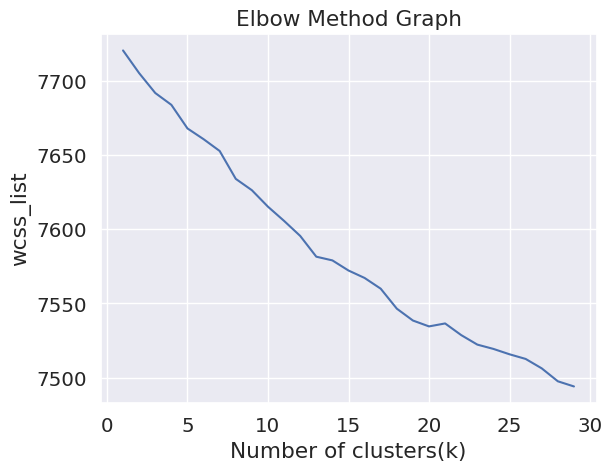

In [ ]:
#plotting elbow method graph
plt.plot(range(1,30),wcss_list)
plt.title('Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
#silhoutte score of clusters
from sklearn.metrics import silhouette_score
sill=[]
for i in range(2,30):
  model= KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(X)
  y1= model.predict(X)
  score=silhouette_score(X,y1)
  sill.append(score)
  print('cluster: %d \t sillhoute: %0.4f'%(i,score))

cluster: 2 	 sillhoute: 0.0019
cluster: 3 	 sillhoute: 0.0016
cluster: 4 	 sillhoute: 0.0017
cluster: 5 	 sillhoute: 0.0023
cluster: 6 	 sillhoute: 0.0024
cluster: 7 	 sillhoute: 0.0027
cluster: 8 	 sillhoute: 0.0034
cluster: 9 	 sillhoute: 0.0036
cluster: 10 	 sillhoute: 0.0040
cluster: 11 	 sillhoute: 0.0042
cluster: 12 	 sillhoute: 0.0046
cluster: 13 	 sillhoute: 0.0052
cluster: 14 	 sillhoute: 0.0050
cluster: 15 	 sillhoute: 0.0052
cluster: 16 	 sillhoute: 0.0053
cluster: 17 	 sillhoute: 0.0055
cluster: 18 	 sillhoute: 0.0061
cluster: 19 	 sillhoute: 0.0061
cluster: 20 	 sillhoute: 0.0062
cluster: 21 	 sillhoute: 0.0060
cluster: 22 	 sillhoute: 0.0062
cluster: 23 	 sillhoute: 0.0064
cluster: 24 	 sillhoute: 0.0065
cluster: 25 	 sillhoute: 0.0065
cluster: 26 	 sillhoute: 0.0067
cluster: 27 	 sillhoute: 0.0068
cluster: 28 	 sillhoute: 0.0069
cluster: 29 	 sillhoute: 0.0070


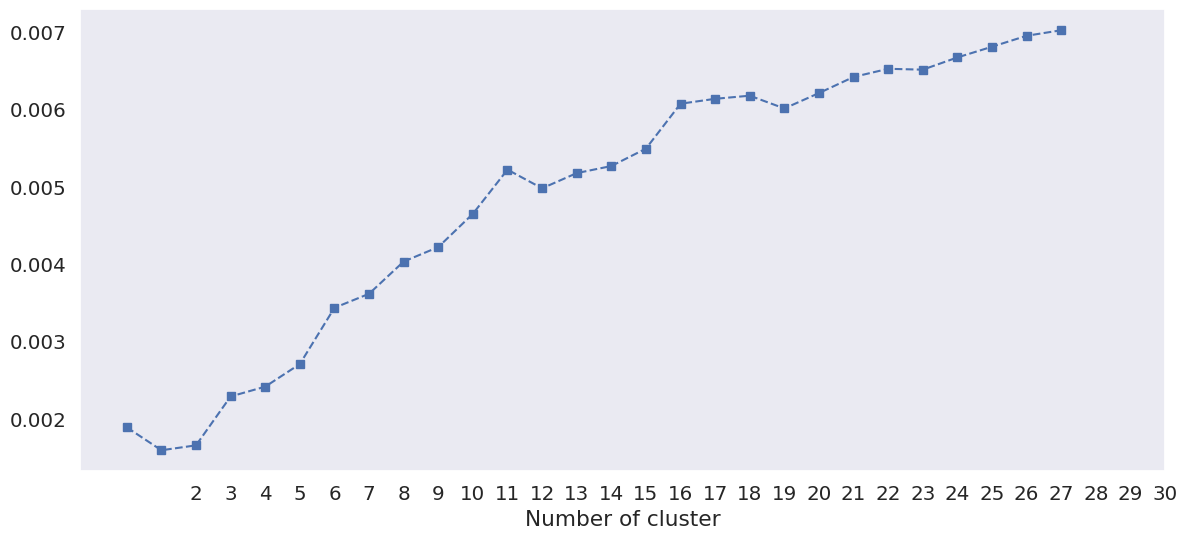

In [ ]:
#Plotting sillhoute score
plt.figure(figsize=(14,6))
plt.plot(sill,'bs--')
plt.xticks(list(range(2,31)),list(range(2,31)))
plt.grid()
plt.xlabel('Number of cluster')
plt.show()

Based on the elbow method and silhoutte score we found that 26 clusters will be formed for the given dataset.

**Training the model**

### Applying KMeans

After selecting the optimal number of clusters using the Elbow Method,
KMeans is applied to the dataset to assign each movie or TV show
to a specific cluster.

In [ ]:
#training the k-means model
kmeans=KMeans(n_clusters=26,init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(X)

# **Model Evaluation**


## Cluster Evaluation

After clustering, it is important to evaluate how well
the clusters are formed.

Since this is an unsupervised learning problem,
Silhouette Score is used for evaluation.

### Silhouette Score

Silhouette Score measures how similar a data point is
to its own cluster compared to other clusters.

- Score ranges from -1 to 1
- Higher score means better clustering
- A positive score indicates well-separated clusters


In [ ]:
#predict the clusters and evaluate the sillhoute score
score=silhouette_score(X,y_predict)
print('silhouette score is {}'.format(score))

silhouette score is 0.006666383201129556


In [ ]:
#davies bouldin score for clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,y_predict)

np.float64(9.993305954520538)

In [ ]:
#adding a seperate column for clusters
df["cluster"]=y_predict

In [ ]:
df['cluster'].value_counts().sort_index()

,count
cluster,
0,303
1,196
2,303
3,463
4,2155
5,144
6,152
7,81
8,260


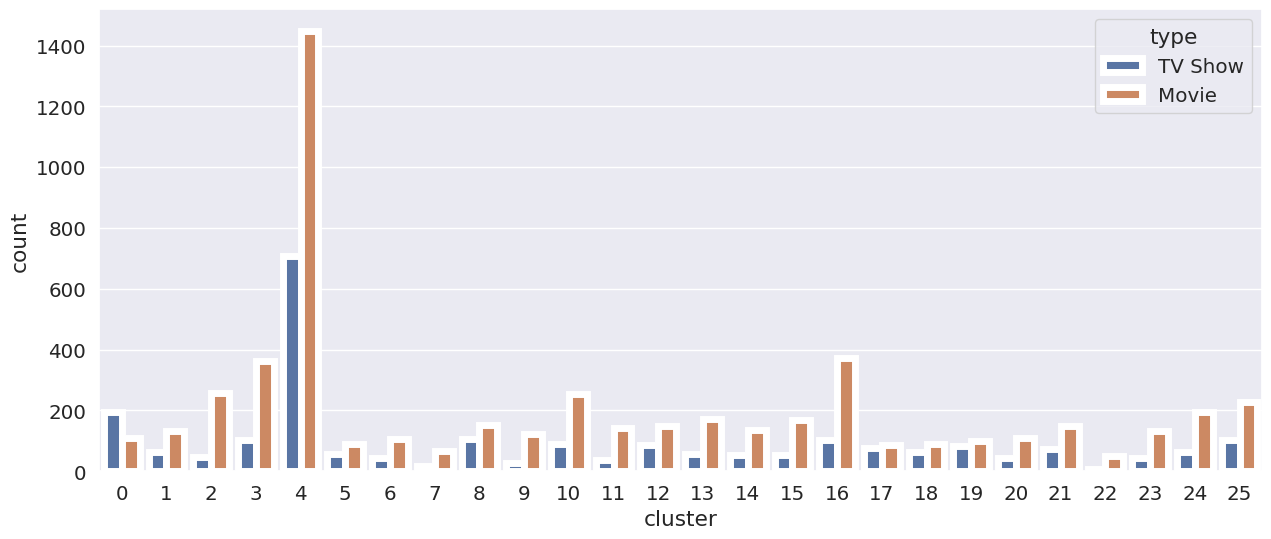

In [ ]:
#plotting graph
fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(x='cluster',hue='type',lw=5,data=df,ax=ax)
plt.show()

from above barplot we can see that third cluster contains the higher number of data points as compared to other clusters.

In [ ]:
#scatter plot for clusters
fig=px.scatter(df,y='description',x='cluster',color='cluster')
fig.update_traces(marker_size=100)
fig.show()

# **Agglomerative clustering algorithm**

Agglomerative clustering is like building a family tree in reverse. You start with individual people and gradually group them together based on their similarities. It's a bottom-up approach where you combine the closest individuals or groups step by step until everyone is in one big family. In data, Agglomerative clustering groups data points based on their distances, creating clusters that are more similar to each other as you move up the hierarchy. It's a bit like putting similar puzzle pieces together to form bigger pieces until you have a complete picture.

In [61]:
#Agglomerative clusters
from sklearn.cluster import AgglomerativeClustering

aggh=AgglomerativeClustering(n_clusters=6,metric='euclidean',linkage='ward')
aggh.fit(X)
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical=df.copy()
#creating a column where each row is assigned to their seperate cluster
df_hierarchical['cluster']=aggh.labels_
df_hierarchical.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,0
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,2
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,2


# **Model evaluation**

In [ ]:
#Sillihouette coefficient
print('sillihouette coefficient: %0.3f'%silhouette_score(X,y_hc,metric='euclidean'))

sillihouette coefficient: -0.002


In [ ]:
#davies bouldin score
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,y_hc)

np.float64(15.374303319822472)

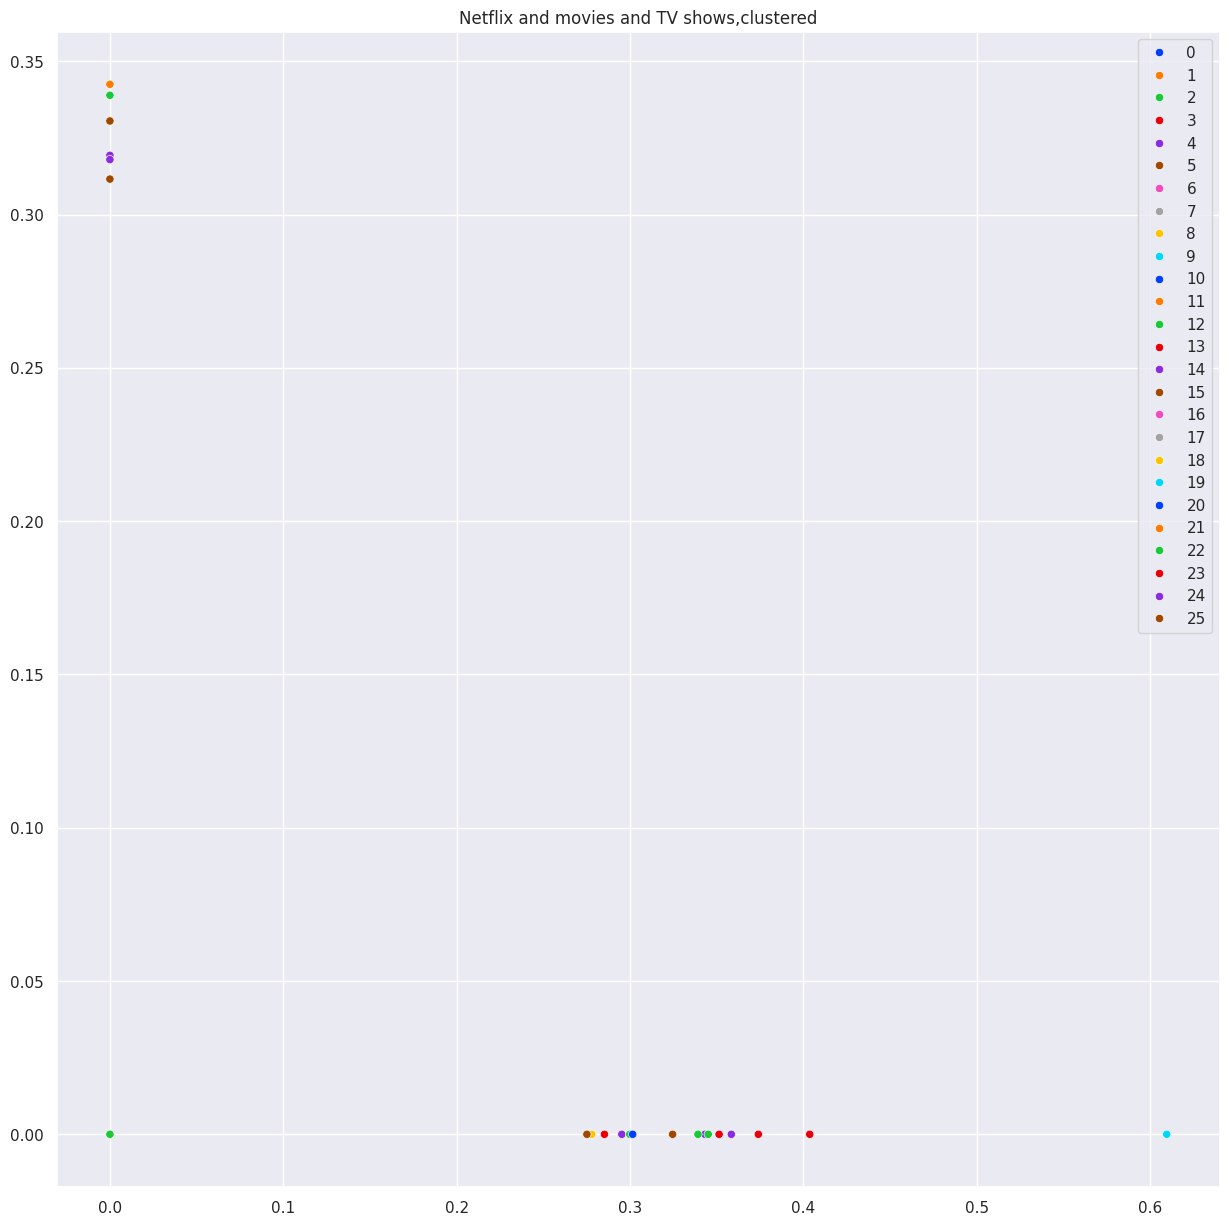

In [ ]:
#Scatterplot for cluster
sns.set(rc={'figure.figsize':(15,15)})
palette=sns.color_palette('bright',len(set(y_predict)))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_predict,palette=palette)
plt.title('Netflix and movies and TV shows,clustered')
plt.show()

# **Conclusion**

In this project, Netflix movies and TV shows were clustered
using unsupervised machine learning techniques.

Text-based features such as genre and description were
converted into numerical form using TF-IDF vectorization.

Two clustering algorithms were applied:
- KMeans clustering for efficient and scalable grouping
- Agglomerative (Hierarchical) clustering to understand
  hierarchical relationships between content

The Elbow Method and Silhouette Score were used to evaluate
the quality of clusters.

Both algorithms produced meaningful clusters, grouping
similar movies and TV shows based on content and themes.

# **Business Impact**

- Clustering helps Netflix group similar movies and TV shows  
- It can improve content recommendation systems  
- Users can easily discover similar content  
- Helps Netflix analyze content trends and genres  
- Supports better decision-making for content planning  

Using both KMeans and Agglomerative clustering provides
more reliable and interpretable results.